In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the labels of the dataset 
path = str(sys.path[0])[:-2]
gender_labels = pd.read_csv(path + '/Datasets/dataset_AMLS_19-20/celeba/labels.csv', delimiter='\t')
gender_labels = gender_labels.iloc[:,1:3]
gender_dict = {1: 1, -1: 0}
gender_labels["gender"].replace(gender_dict, inplace=True)
gender_labels.head()


,img_name,gender
0,0.jpg,0
1,1.jpg,0
2,2.jpg,1
3,3.jpg,0
4,4.jpg,0


In [3]:
ROWS = 64
COLS = 64
CHANNELS = 3
print(gender_labels.shape)
# Create dataframes for test and train data split into .75 and .25 for train and test respectively
X_train = pd.DataFrame(np.zeros((int(.75*gender_labels.shape[0]), ROWS * COLS * CHANNELS)))
X_test = pd.DataFrame(np.zeros((int(.25*gender_labels.shape[0]), ROWS * COLS * CHANNELS)))
y_train = list()
y_test = list()

(5000, 2)


In [4]:
def get_binary_training_data(classifier, data_set):
    # split the data into the two types
    data_one = data_set[data_set[classifier] == 1]
    data_two = data_set[data_set[classifier] == 0]
    # Splitting data into train and test
    train_one_data, test_one_data = train_test_split(data_one)
    train_two_data, test_two_data = train_test_split(data_two)
    # Create final test data set out of male and female data
    test_indices = test_one_data.index.tolist() + test_two_data.index.tolist()
    test_data = data_set.iloc[test_indices,:]
    train_data = pd.concat([data_set, test_data, test_data]).drop_duplicates(keep=False)
    
    return train_data, test_data

In [5]:
train_data, test_data = get_binary_training_data('gender', gender_labels)

In [6]:
# Read the image names 
img_path = path + 'Datasets/dataset_AMLS_19-20/celeba/img/' # path of your image folder
train_image_name = [img_path + each for each in train_data['img_name'].values.tolist()]
test_image_name = [img_path + each for each in test_data['img_name'].values.tolist()]

In [7]:
# Splitting male and female data into train and test
train_male_data, test_male_data = train_test_split(male_data)
train_female_data, test_female_data = train_test_split(female_data)
train_female_data.head()

NameError: name 'male_data' is not defined

In [ ]:
# Create final test data set out of male and female data
test_indices = test_female_data.index.tolist() + test_male_data.index.tolist()
test_data = gender_labels.iloc[test_indices,:]
test_data.head()

In [8]:
def prep_img(img_path, rows, columns):
    # resize the image and flatten to use in LR
    img = cv2.imread(img_path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (rows, columns))
    return(pd.Series(img.flatten()))


In [9]:
def create_train_set(image_list, labels):
    
    counter_train = 0
    X_train = pd.DataFrame(np.zeros((int(.75*labels.shape[0]), ROWS * COLS * CHANNELS)))
    y_train = list()

    # create the training set
    for img in image_list:
        X_train.iloc[counter_train, :] = prep_img(img, ROWS, COLS) / 255
        counter_train += 1
    
    y_train = train_data.iloc[:,1].values.tolist()
    return X_train, y_train


In [10]:
#print(y_train)

In [11]:
# create the test dataset
def create_test_set(image_list, labels):
    counter_test = 0
    X = pd.DataFrame(np.zeros((int(.25*labels.shape[0]), ROWS * COLS * CHANNELS)))
    y = list()
    for img in image_list:
        X.iloc[counter_test, :] = prep_img(img, ROWS, COLS) / 255
        counter_test += 1

    y = test_data.iloc[:,1].values.tolist()
    return X, y

In [12]:
def create_dataset(labels):
    
    img_path = path + 'Datasets/dataset_AMLS_19-20/celeba/img/' # path of your image folder
    train_image_name = [img_path + each for each in train_data['img_name'].values.tolist()]
    test_image_name = [img_path + each for each in test_data['img_name'].values.tolist()]
    
    # Create dataframes for test and train data split into .75 and .25 for train and test respectively
    X_train, y_train = create_train_set(train_image_name, labels)
    print(X_train.shape)
    print(len(y_train))
    X_test, y_test = create_test_set(test_image_name, labels)
    print(X_test.shape)
    print(len(y_test))
    return X_train, y_train, X_test, y_test

In [13]:
def create_model():
    return LogisticRegression(C=0.15, max_iter=400, solver='liblinear')


In [14]:
def train_model(model, X, y):
    model.fit(X, y)
    return model.score(X,y)

In [ ]:
def test_model(model, X, y):
    predictions = model.predict(X)
    return model.score(X, y)

In [15]:
X_train, y_train, X_test, y_test = create_dataset(gender_labels)


(3750, 12288)
3750
(1250, 12288)
1250


In [16]:
logreg_classifier = create_model()
logreg_classifier_trained = train_model(logreg_classifier, X_train, y_train)

In [17]:
predictions = logreg_classifier_trained.predict(X_test)

In [18]:
logreg_classifier_trained.score(X_test, y_test)

0.8904

In [19]:
print(logreg_classifier.score(X_train, y_train))


0.9944


In [20]:
def pretty_cm(y_pred, y_truth, labels):
    # pretty implementation of a confusion matrix
    cm = confusion_matrix(y_truth, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'BuGn_r')
    # labels, title and ticks
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.title('Accuracy: {0}'.format(accuracy_score(y_truth, y_pred)), size = 15) 
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    

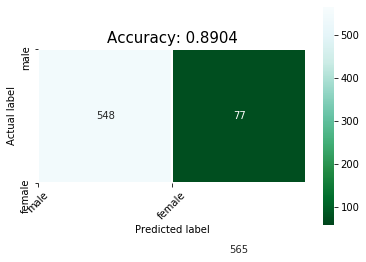

In [21]:
pretty_cm(predictions, y_test, ['male', 'female'])


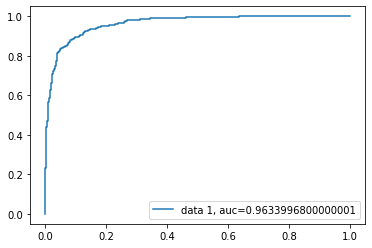

In [22]:
y_pred_proba = logreg_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()